This program will be using the All-CNN network published in the paper, "Striving for Simplicity: The all Convolutional Network"

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

Using Theano backend.
C:\Users\rradawiec\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rradawiec\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rradawiec\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rradawiec\Anaconda3\lib\site-packages\tensorflow\python\framewo

In [2]:
import sys
import keras
print('Python: {}'.format(sys.version))
print('Keras: {}'. format(keras.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Keras: 2.3.1


In [3]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #from keras dataset built in/ All images

In [4]:
#determin the charactreistics of the dataset
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))
#RGB images have 3, 32x32 images

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
#A single image
print(X_train[0].shape)

(32, 32, 3)


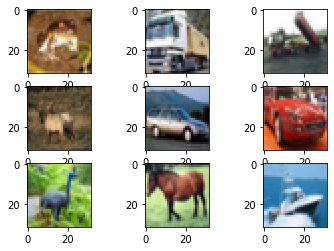

In [6]:
#create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[0 +i]
    plt.imshow(img)
    
#show the plot
plt.show()

In [7]:
#preprocess the dataset

#fix random seed for reproducibility
seed = 6
np.random.seed(seed)

#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0


In [8]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [9]:
#class labels shape
print(y_train.shape)
print(y_train[0]) #the label of the category

(50000, 1)
[6]


In [10]:
# 6 = [0, 0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0] one hot vector version 
# a class label of 6 non-one hot vector will skew the data in its model

#hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_class = Y_test.shape[1]
print(num_class)

print(Y_train.shape)
print(Y_train[0]) # does indeed look like a frog

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


3. Building the all CNN

We can use Keras to simply add layers to a model one after another.

In [11]:
#Start by importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [12]:
#define the model function

def allcnn(weights = None):
    
    #define model type- sequential
    model = Sequential()
    
    #add model layers
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape = (32, 32, 3))) #96 neurons with a 3x3 convolution with image size of (32, 32, 3)
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding ='same', strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3), padding ='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1,1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1,1), padding = 'valid'))
    
    #Add Global Average Pooling Layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights
    if weights:
        model.load_weights(weights)
        
    #return the model
    return model

In [13]:
#define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#build model
model = allcnn()

#define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

#print  model summary
print(model.summary())

#define additional training parameters
epochs = 350
batch_size = 32 #means you run 32 images then update loss instead of updating after each image

#fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)      

KeyboardInterrupt: 


5. Woah, that's a long time...

Uh oh. It's apparent that training this deep convolutional neural network is going to take a long time, which is not surprising considering the network has about 1.3 million parameters. Updating this many parameters takes a considerable amount of time; unless, of course, you are using a Graphics Processing Unit (GPU). This is a good time for a quick lesson on the differences between CPUs and GPUs.

The central processing unit (CPU) is often called the brains of the PC because it handles the majority of necessary computations. All computers have a CPU and this is what Keras and Theano automatically utilize.
The graphics processing unit (GPU) is in charge of image rendering. The most advanced GPUs were originally designed for gamers; however, GPU-accelerated computing, the use of a GPU together with a CPU to accelarate deep learing, analytics, and engineering applications, has become increasingly common. In fact, the training of deep neural networks is not realistic without them.

The most common GPUs for deep learning are produced by NVIDIA. Furthermore, the NVIDIA Deep Learning SDK provides high-performance tools and libraries to power GPU-accelerated machine learning applications. An alternative would be an AMD GPU in combination with the OpenCL libraries; however, these libraries have fewer active users and less support than the NVIDIA libraries.

If your computer has an NVIDIA GPU, installing the CUDA Drivers and CUDA Tookit from NVIDIA will allow Theano and Keras to utilize GPU-accelerated computing. The original paper mentions that it took approximately 10 hours to train the All-CNN network for 350 epochs using a modern GPU, which is considerably faster (several orders of magnitude) than it would take to train on CPU.

If you haven't already, stop the cell above. In the following cells, we'll save some time by loading pre-trained weights for the All-CNN network. Using these weights, we can evaluate the performance of the All-CNN network on the testing dataset.

In [15]:
#define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

#build model and define weights
weights ='all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

#define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

#print  model summary
print(model.summary())

#No longer need training parameters as weights are now predefined

#Test the model instead of fitting it with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose =1)
print('Accuracy: {}'.format(scores[1]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 192)      

In [16]:
#making dictionary of clas labels and names
classes = range(0,10)

names = ['airplane',
         'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

#zip the names and classes to make a dicrionary of class labels
class_labels=dict(zip(classes, names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [17]:
#generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis =-1)

#make predictions 
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 8ms/step


In [19]:
#print out predictions
print(predictions) #class probabilities per image as a float
print(predictions.shape)

[[3.34924293e-19 2.15254109e-19 1.36195595e-11 7.40426736e-14
  9.99999940e-01 7.98331357e-09 7.02509698e-16 6.67015883e-08
  2.10513124e-21 6.66425009e-18]
 [6.29245679e-13 3.24948571e-14 3.37529002e-07 4.88843303e-04
  7.45293255e-06 9.98557985e-01 7.16788273e-09 9.45363776e-04
  4.90904886e-12 1.51181734e-10]
 [3.73208201e-24 6.11101040e-24 7.35293771e-19 2.90923193e-17
  1.78009051e-22 2.12189032e-16 1.00000000e+00 1.14791947e-22
  8.27290064e-27 8.52567242e-22]
 [2.25064471e-18 7.57584285e-20 4.78788564e-09 1.00000000e+00
  4.77509943e-09 2.97874850e-11 1.40486418e-12 1.34754768e-15
  1.82799522e-19 1.35613839e-16]
 [3.47528476e-33 1.00000000e+00 1.36117929e-40 7.24730176e-37
  8.84107227e-41 1.55544130e-43 1.24007908e-40 1.69775320e-35
  1.02666903e-26 3.85468670e-21]
 [6.84766508e-31 1.00000000e+00 3.20374304e-34 4.26633685e-31
  1.68707227e-39 2.88708484e-34 4.96821747e-31 5.68708229e-30
  1.12214496e-30 2.82542822e-19]
 [8.00859053e-19 6.52500424e-21 2.11738099e-10 1.00000000e

In [20]:
#these are class probabilities, should sum to 1
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [26]:
#use np.argmax() to convert class probablities to class labels
class_results = np.argmax(predictions, axis = -1)
print(class_results)

[4 5 6 3 1 1 3 6 8]


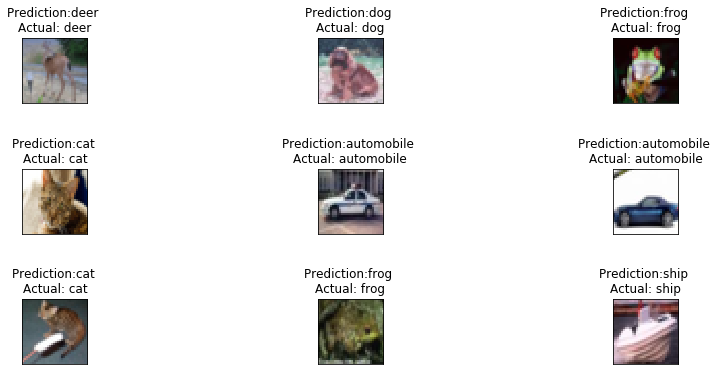

In [29]:
# Create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
    
    #determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_results[i] == key:
            title = 'Prediction:{} \nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    #plot the image
    axs[i].imshow(img)
    
#show the plot
plt.show()

In [30]:
#For new/ different datasets may not necessarily train from scratch. Preloaded weights will already be good at edge detection, and only some fine tuning may be necessary